<a href="https://colab.research.google.com/github/aastha073/CS-558/blob/main/asingh101_cs558_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def filter_image(input, filter):
    """
    Return the convolution result: image * kernel.
    Caution: use zero-padding.

    Input- image: H x W
           filter: h x w
    Output- convolve: H x W
    """

    #dimensions
    H, W = input.shape
    h, w = filter.shape

    #padding needed (keeping output size=input size)
    pad_h = h // 2
    pad_w = w // 2

    #create zero-padded image
    padded_H = H + 2 * pad_h
    padded_W = W + 2 * pad_w
    padded_image = np.zeros((padded_H, padded_W), dtype=np.float64)

    #copy original image into center of padded image
    padded_image[pad_h:pad_h + H, pad_w:pad_w + W] = input.astype(np.float64)

    #output
    output = np.zeros((H, W), dtype=np.float64)

    #Perform convolution
    for i in range(H):
        for j in range(W):
            #extract region of interest
            region = padded_image[i:i + h, j:j + w]

            #element-wise multiplication and sum
            output[i, j] = np.sum(region * filter)


    return output


In [38]:
def generate_gaussian(sigma):
    """
    Return kernel of appropriate size
    Caution: coefficients must sum to 1

    Input- sigma: scalar (should be positive but it will be squared anyway)
    Output- kernel: W x W (no need to return W)
    """
    #to ensure positive
    sigma = sigma * sigma

    #determining kernel size
    size = int(6 * np.sqrt(sigma))
    if size % 2 == 0:
        size += 1
    if size < 3:
        size = 3

    #Create kernel
    kernel = np.zeros((size, size), dtype=np.float64)
    center = size // 2

    #Fill kernel with Gaussian values
    for i in range(size):
        for j in range(size):
            x = i - center
            y = j - center
            # Gaussian formula: G(x,y) = (1/(2*pi*sigma^2)) * exp(-(x^2 + y^2)/(2*sigma^2))
            kernel[i, j] = np.exp(-(x**2 + y**2) / (2 * sigma))

    #normalizing so coefficients sum to 1
    kernel = kernel / np.sum(kernel)

    return kernel


In [39]:
def templ_sad(canvas, template):
    """
    Input- image: H x W
    Input- template: h x w
    Output - coordinates of the best match
    """
    H, W = canvas.shape
    h, w = template.shape

    curr_best = np.inf
    tx = 0
    ty = 0

    #slide template across the canvas
    for y in range(H - h + 1):
        for x in range(W - w + 1):
            #extract window from canvas
            window = canvas[y:y + h, x:x + w]

            #SAD calculation: sum of absolute differences
            sad = np.sum(np.abs(window.astype(np.float64) - template.astype(np.float64)))

            #updating best match (basing on that lower is better for SAD)
            if sad < curr_best:
                curr_best = sad
                tx = x
                ty = y

    print('Found template at ' + repr(tx) + ' ' + repr(ty) + ' with cost ' + repr(curr_best))

    return tx, ty


In [24]:
def templ_ncc(canvas, template):
    """
    Input- image: H x W
    Input- template: h x w
    Output - coordinates of the best match
    """

    H, W = canvas.shape
    h, w = template.shape

    curr_best = -np.inf
    tx = 0
    ty = 0

    #template statistics
    template_float = template.astype(np.float64)
    t_mean = np.mean(template_float)
    t_centered = template_float - t_mean
    t_std = np.sqrt(np.sum(t_centered ** 2))

    #slide template across the canvas
    for y in range(H - h + 1):
        for x in range(W - w + 1):
            #extract window from canvas
            window = canvas[y:y + h, x:x + w].astype(np.float64)

            #window statistics
            w_mean = np.mean(window)
            w_centered = window - w_mean
            w_std = np.sqrt(np.sum(w_centered ** 2))

            # Calculate NCC
            # NCC = sum((window - mean_window) * (template - mean_template)) /
            #       sqrt(sum((window - mean_window)^2) * sum((template - mean_template)^2))

            #avoiding div by 0
            if w_std < 1e-10 or t_std < 1e-10:
                ncc = -1.0
            else:
                numerator = np.sum(w_centered * t_centered)
                denominator = w_std * t_std
                ncc = numerator / denominator

            #update best match (higher is better for NCC)
            if ncc > curr_best:
                curr_best = ncc
                tx = x
                ty = y

    print('Found template at ' + repr(tx) + ' ' + repr(ty) + ' with score ' + repr(curr_best))

    return tx, ty


In [40]:

def imshow(image, *args, **kwargs):
    if len(image.shape) == 3:
      # Height, width, channels
      # Assume BGR, do a conversion since
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
      # Height, width - must be grayscale
      # convert to RGB, since matplotlib will plot in a weird colormap (instead of black = 0, white = 1)
      image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    # Draw the image
    plt.imshow(image, *args, **kwargs)
    # We'll also disable drawing the axes and tick marks in the plot, since it's actually an image
    plt.axis('off')
    # Make sure it outputs
    plt.show()

Mounted at /content/gdrive


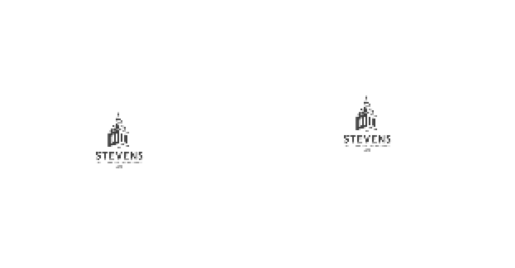

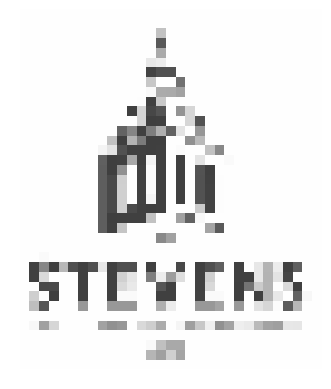

Found template at 200 50 with cost np.float64(958.0)
Found template at 200 50 with score np.float64(0.9999659478599527)


(200, 50)

In [41]:
# Simple Template Matching
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
rootpath = '/content/gdrive/MyDrive/cs558_resources/hw2'
templ_image = cv2.imread(os.path.join(rootpath, "logo38.png"))
input_image = cv2.imread(os.path.join(rootpath, "match_clean.png"))
# the images are gray scale but png is a 3-channel format
templ_image = cv2.cvtColor(templ_image, cv2.COLOR_BGR2GRAY)
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
imshow(input_image)
imshow(templ_image)

templ_sad(input_image, templ_image)
templ_ncc(input_image, templ_image)

Mounted at /content/gdrive
Template shape: (38, 32)

TESTING ON CLEAN IMAGE FIRST

Displaying clean image and template:


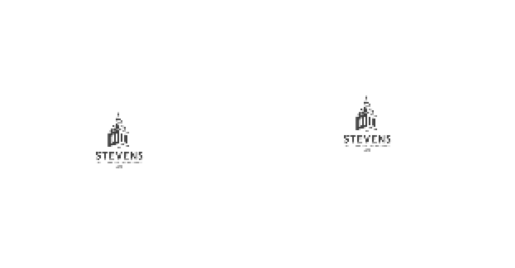

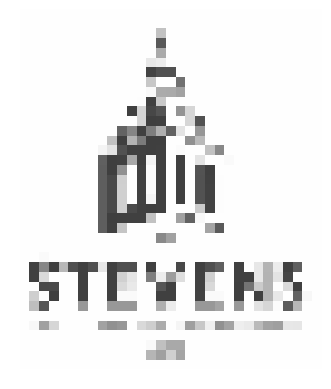


Testing on clean image:
Found template at 200 50 with cost np.float64(958.0)
Found template at 200 50 with score np.float64(0.9999659478599527)

TESTING ON NOISY IMAGES (match2.png to match16.png)

Processing match2.png - Noise Level: 10%

Displaying match2.png:


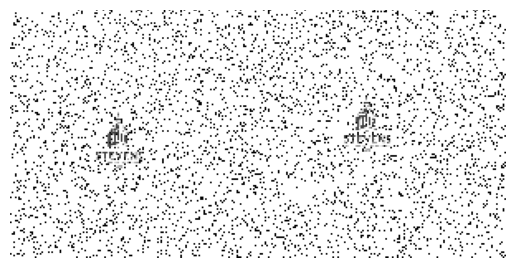


--- Running SAD ---
Found template at 200 50 with cost np.float64(27288.0)

--- Running NCC ---
Found template at 200 50 with score np.float64(0.5633679436484315)

✓ Template DETECTED

Processing match4.png - Noise Level: 20%

Displaying match4.png:


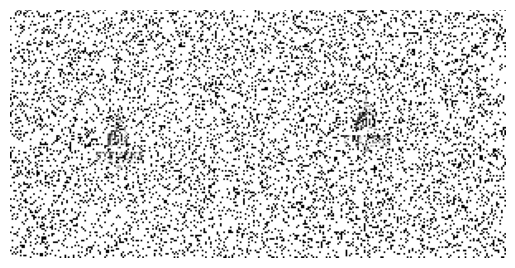


--- Running SAD ---
Found template at 50 60 with cost np.float64(50231.0)

--- Running NCC ---
Found template at 50 60 with score np.float64(0.3905078835697093)

✓ Template DETECTED

Processing match6.png - Noise Level: 30%

Displaying match6.png:


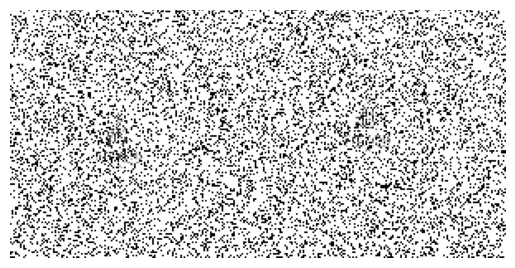


--- Running SAD ---
Found template at 200 50 with cost np.float64(67075.0)

--- Running NCC ---
Found template at 50 60 with score np.float64(0.28894647148317404)

✗ Template NOT detected reliably (NCC = 0.2889)

Processing match8.png - Noise Level: 40%

Displaying match8.png:


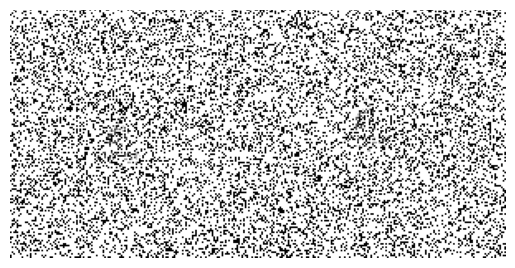


--- Running SAD ---
Found template at 100 95 with cost np.float64(75682.0)

--- Running NCC ---
Found template at 200 50 with score np.float64(0.19138808420187967)

✗ Template NOT detected reliably (NCC = 0.1914)

Processing match10.png - Noise Level: 50%

Displaying match10.png:


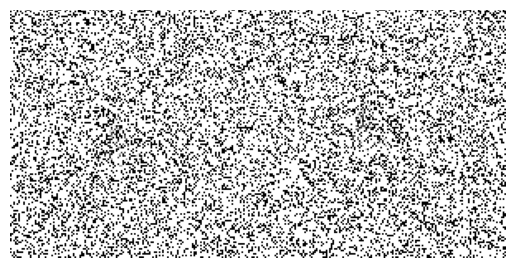


--- Running SAD ---
Found template at 144 72 with cost np.float64(78762.0)

--- Running NCC ---
Found template at 200 50 with score np.float64(0.1448056203073675)

✗ Template NOT detected reliably (NCC = 0.1448)

Processing match12.png - Noise Level: 60%

Displaying match12.png:


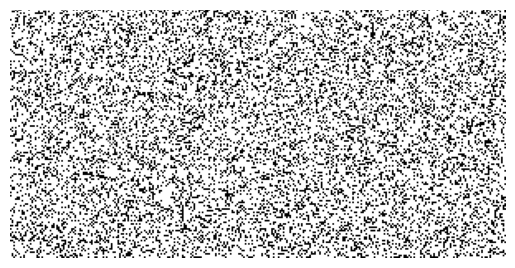


--- Running SAD ---
Found template at 125 69 with cost np.float64(76626.0)

--- Running NCC ---
Found template at 19 16 with score np.float64(0.13890216767934238)

✗ Template NOT detected reliably (NCC = 0.1389)

Processing match14.png - Noise Level: 70%

Displaying match14.png:


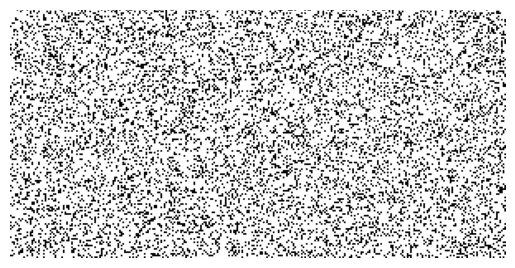


--- Running SAD ---
Found template at 245 29 with cost np.float64(71028.0)

--- Running NCC ---
Found template at 250 56 with score np.float64(0.11588130295217193)

✗ Template NOT detected reliably (NCC = 0.1159)

Processing match16.png - Noise Level: 80%

Displaying match16.png:


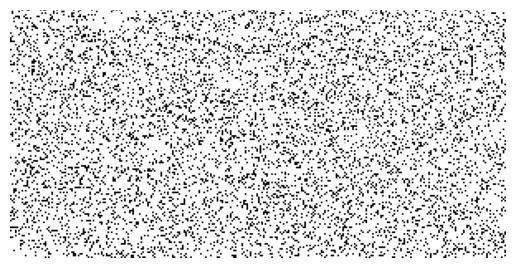


--- Running SAD ---
Found template at 125 11 with cost np.float64(59671.0)

--- Running NCC ---
Found template at 121 85 with score np.float64(0.14105200906179674)

✗ Template NOT detected reliably (NCC = 0.1411)

RESULTS TABLE

Noise Level     SAD Cost             NCC Score            Status         
----------------------------------------------------------------------
10%             27288.00             0.5634               Detected
20%             50231.00             0.3905               Detected
30%             N/A                  N/A                  Not Detected
40%             N/A                  N/A                  Not Detected
50%             N/A                  N/A                  Not Detected
60%             N/A                  N/A                  Not Detected
70%             N/A                  N/A                  Not Detected
80%             N/A                  N/A                  Not Detected

CREATING GRAPHS


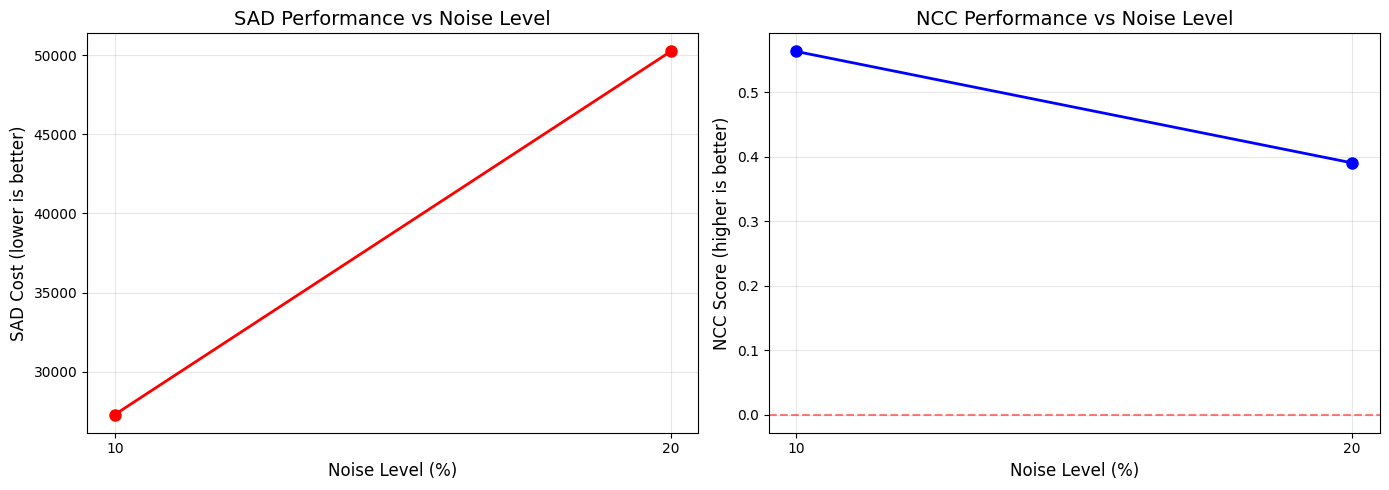

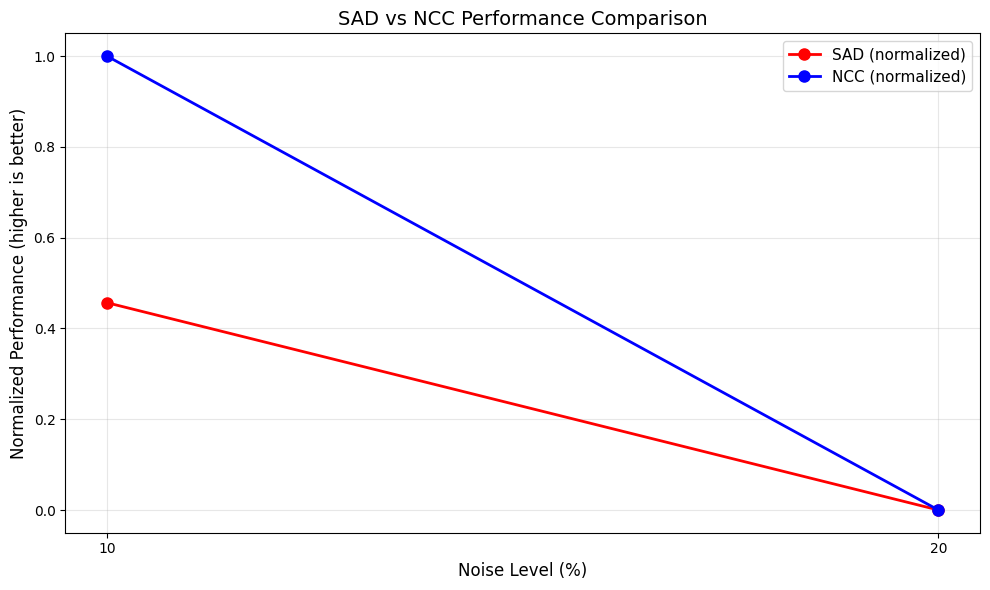

In [42]:

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
rootpath = '/content/gdrive/MyDrive/cs558_resources/hw2'

# Load template
templ_image = cv2.imread(os.path.join(rootpath, "logo38.png"))
templ_image = cv2.cvtColor(templ_image, cv2.COLOR_BGR2GRAY)

print("Template shape:", templ_image.shape)
print("\n" + "="*70)
print("TESTING ON CLEAN IMAGE FIRST")
print("="*70)

# Test on clean image first
input_image = cv2.imread(os.path.join(rootpath, "match_clean.png"))
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

print("\nDisplaying clean image and template:")
imshow(input_image)
imshow(templ_image)

print("\nTesting on clean image:")
x_sad_clean, y_sad_clean = templ_sad(input_image, templ_image)
x_ncc_clean, y_ncc_clean = templ_ncc(input_image, templ_image)

print("\n" + "="*70)
print("TESTING ON NOISY IMAGES (match2.png to match16.png)")
print("="*70)


results = []

# Loop through all noisy images
for i in range(2, 18, 2):
    noise_percent = i * 5
    filename = f'match{i}.png'

    print(f"\n{'='*70}")
    print(f"Processing {filename} - Noise Level: {noise_percent}%")
    print(f"{'='*70}")

    try:
        # Load noisy image
        noisy_image = cv2.imread(os.path.join(rootpath, filename))
        if noisy_image is None:
            print(f"ERROR: Could not load {filename}")
            continue

        noisy_image = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY)

        # Display the noisy image
        print(f"\nDisplaying {filename}:")
        imshow(noisy_image)

        # Run SAD - capture the printed output to extract the score
        print("\n--- Running SAD ---")
        x_sad, y_sad = templ_sad(noisy_image, templ_image)

        # Calculate SAD score
        H, W = noisy_image.shape
        h, w = templ_image.shape
        window_sad = noisy_image[y_sad:y_sad + h, x_sad:x_sad + w]
        sad_score = np.sum(np.abs(window_sad.astype(np.float64) - templ_image.astype(np.float64)))

        # Run NCC - capture the printed output to extract the score
        print("\n--- Running NCC ---")
        x_ncc, y_ncc = templ_ncc(noisy_image, templ_image)

        # Calculate NCC score
        window_ncc = noisy_image[y_ncc:y_ncc + h, x_ncc:x_ncc + w].astype(np.float64)
        template_float = templ_image.astype(np.float64)

        w_mean = np.mean(window_ncc)
        t_mean = np.mean(template_float)
        w_centered = window_ncc - w_mean
        t_centered = template_float - t_mean
        w_std = np.sqrt(np.sum(w_centered ** 2))
        t_std = np.sqrt(np.sum(t_centered ** 2))

        if w_std < 1e-10 or t_std < 1e-10:
            ncc_score = -1.0
        else:
            ncc_score = np.sum(w_centered * t_centered) / (w_std * t_std)

        # Check if template was actually detected (basic sanity check)
        #template detected if NCC > 0.3 or SAD is reasonable
        detected = ncc_score > 0.3

        if detected:
            results.append({
                'noise_level': noise_percent,
                'filename': filename,
                'sad_x': x_sad,
                'sad_y': y_sad,
                'sad_score': sad_score,
                'ncc_x': x_ncc,
                'ncc_y': y_ncc,
                'ncc_score': ncc_score,
                'detected': True
            })
            print(f"\n✓ Template DETECTED")
        else:
            print(f"\n✗ Template NOT detected reliably (NCC = {ncc_score:.4f})")
            results.append({
                'noise_level': noise_percent,
                'filename': filename,
                'detected': False
            })

    except Exception as e:
        print(f"ERROR processing {filename}: {e}")
        import traceback
        traceback.print_exc()

print("\n" + "="*70)
print("RESULTS TABLE")
print("="*70)

# Print table header
print(f"\n{'Noise Level':<15} {'SAD Cost':<20} {'NCC Score':<20} {'Status':<15}")
print("-" * 70)

#results for successfully detected templates
for result in results:
    if result['detected']:
        print(f"{result['noise_level']}%{'':<12} "
              f"{result['sad_score']:<20.2f} "
              f"{result['ncc_score']:<20.4f} "
              f"Detected")
    else:
        print(f"{result['noise_level']}%{'':<12} "
              f"{'N/A':<20} "
              f"{'N/A':<20} "
              f"Not Detected")

#visualization graph of scores vs noise level
print("\n" + "="*70)
print("CREATING GRAPHS")
print("="*70)

detected_results = [r for r in results if r['detected']]

if len(detected_results) > 0:
    noise_levels = [r['noise_level'] for r in detected_results]
    sad_scores = [r['sad_score'] for r in detected_results]
    ncc_scores = [r['ncc_score'] for r in detected_results]


    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Plot SAD scores (lower is better)
    ax1.plot(noise_levels, sad_scores, 'ro-', linewidth=2, markersize=8)
    ax1.set_xlabel('Noise Level (%)', fontsize=12)
    ax1.set_ylabel('SAD Cost (lower is better)', fontsize=12)
    ax1.set_title('SAD Performance vs Noise Level', fontsize=14)
    ax1.grid(True, alpha=0.3)
    ax1.set_xticks(noise_levels)

    # Plot NCC scores (higher is better)
    ax2.plot(noise_levels, ncc_scores, 'bo-', linewidth=2, markersize=8)
    ax2.set_xlabel('Noise Level (%)', fontsize=12)
    ax2.set_ylabel('NCC Score (higher is better)', fontsize=12)
    ax2.set_title('NCC Performance vs Noise Level', fontsize=14)
    ax2.grid(True, alpha=0.3)
    ax2.set_xticks(noise_levels)
    ax2.axhline(y=0, color='r', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

    # Combined plot for comparison
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))

    # Normalize both scores to 0-1 range for comparison
    sad_normalized = 1 - (np.array(sad_scores) / np.max(sad_scores))  # Invert because lower is better
    ncc_normalized = (np.array(ncc_scores) - np.min(ncc_scores)) / (np.max(ncc_scores) - np.min(ncc_scores))

    ax.plot(noise_levels, sad_normalized, 'ro-', linewidth=2, markersize=8, label='SAD (normalized)')
    ax.plot(noise_levels, ncc_normalized, 'bo-', linewidth=2, markersize=8, label='NCC (normalized)')
    ax.set_xlabel('Noise Level (%)', fontsize=12)
    ax.set_ylabel('Normalized Performance (higher is better)', fontsize=12)
    ax.set_title('SAD vs NCC Performance Comparison', fontsize=14)
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3)
    ax.set_xticks(noise_levels)

    plt.tight_layout()
    plt.show()



Mounted at /content/gdrive
Map image shape: (486, 612)
Template shape: (38, 32)


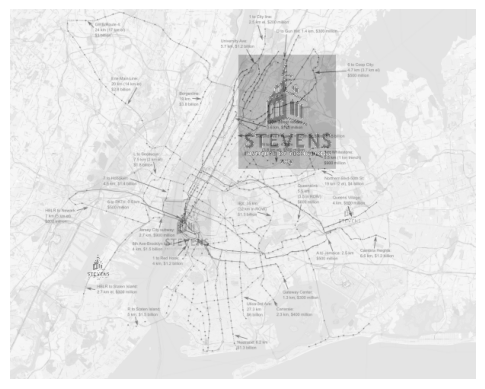

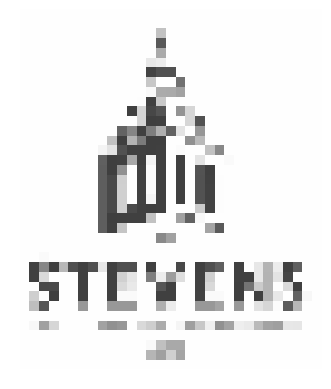


STEP 1: Finding FIRST small-scale instance
Found template at 100 320 with cost np.float64(29636.0)
Found template at 100 320 with score np.float64(0.9250413595639998)

STEP 2: Finding SECOND small-scale instance
Found second template at 430 250 with score np.float64(0.5931177149209546)

STEP 3: Preparing for medium-scale detection
Gaussian kernel for sigma = 1.0
Kernel size: (7, 7)
Kernel sum: 1.0

Applying Gaussian filter to map image...
Filtered map shape: (486, 612)

Downsampling by factor of 2...
Downsampled 2x shape: (243, 306)


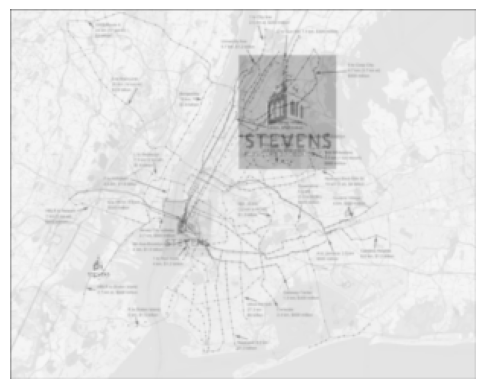


STEP 4: Finding MEDIUM-scale template (2x larger)
Found template at 100 125 with score np.float64(0.5735592084107363)
Medium-scale match at original coords: (200, 250)

STEP 5: Preparing for large-scale detection
Downsampled 4x shape: (121, 153)


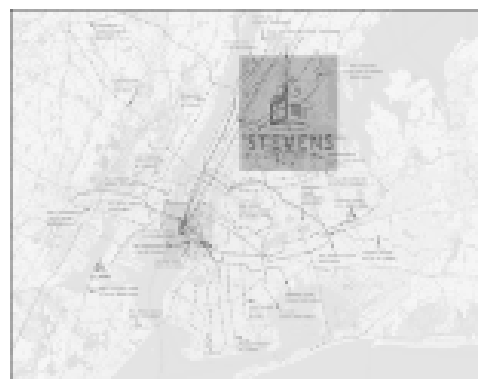


STEP 6: Finding LARGE-scale template (4x larger)
Found template at 75 15 with score np.float64(0.607393335592754)
Large-scale match at original coords: (300, 60)

SUMMARY OF ALL DETECTIONS
Small-scale 1: (100, 320)
Small-scale 2: (430, 250)
Medium-scale:  (200, 250)
Large-scale:   (300, 60)

VISUALIZATION
Displaying all detected templates at different scales...


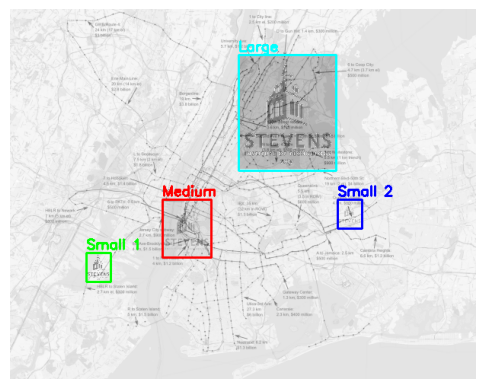

In [43]:
# Multi-scale Template Matching
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
rootpath = '/content/gdrive/MyDrive/cs558_resources/hw2'

smalltempl_image = cv2.imread(os.path.join(rootpath, "logo38.png"))
smalltempl_image = cv2.cvtColor(smalltempl_image, cv2.COLOR_BGR2GRAY)
map_image = cv2.imread(os.path.join(rootpath, "multiscale.png"))
map_image = cv2.cvtColor(map_image, cv2.COLOR_BGR2GRAY)

print("Map image shape:", map_image.shape)
print("Template shape:", smalltempl_image.shape)

imshow(map_image)
imshow(smalltempl_image)

print("\n" + "="*60)
print("STEP 1: Finding FIRST small-scale instance")
print("="*60)
x1_sad, y1_sad = templ_sad(map_image, smalltempl_image)
x1_ncc, y1_ncc = templ_ncc(map_image, smalltempl_image)

# Use NCC results (better for this problem due to intensity transformations)
x1_small = x1_ncc
y1_small = y1_ncc

print("\n" + "="*60)
print("STEP 2: Finding SECOND small-scale instance")
print("="*60)
# TODO find second instance of small-scale template

H, W = map_image.shape
h, w = smalltempl_image.shape

curr_best = -np.inf
x2_small = 0
y2_small = 0

#template statistics for NCC
template_float = smalltempl_image.astype(np.float64)
t_mean = np.mean(template_float)
t_centered = template_float - t_mean
t_std = np.sqrt(np.sum(t_centered ** 2))

# Minimum distance from first match
min_distance = 50

for y in range(H - h + 1):
    for x in range(W - w + 1):
        # Calculate distance from first match
        distance = np.sqrt((x - x1_small)**2 + (y - y1_small)**2)

        # Skip if too close to first match
        if distance < min_distance:
            continue

        # Extract window
        window = map_image[y:y + h, x:x + w].astype(np.float64)

        # Calculate NCC
        w_mean = np.mean(window)
        w_centered = window - w_mean
        w_std = np.sqrt(np.sum(w_centered ** 2))

        if w_std < 1e-10 or t_std < 1e-10:
            ncc = -1.0
        else:
            numerator = np.sum(w_centered * t_centered)
            denominator = w_std * t_std
            ncc = numerator / denominator

        if ncc > curr_best:
            curr_best = ncc
            x2_small = x
            y2_small = y

print('Found second template at ' + repr(x2_small) + ' ' + repr(y2_small) + ' with score ' + repr(curr_best))

print("\n" + "="*60)
print("STEP 3: Preparing for medium-scale detection")
print("="*60)
# TODO low-pass filter and downsample input image
sigma = 1.0
kernel = generate_gaussian(sigma)
print('Gaussian kernel for sigma = ' + repr(sigma))
print('Kernel size:', kernel.shape)
print('Kernel sum:', np.sum(kernel))

# Apply Gaussian filter to map image
print("\nApplying Gaussian filter to map image...")
filtered_map = filter_image(map_image, kernel)
print("Filtered map shape:", filtered_map.shape)

# Downsample by factor of 2 for medium-scale
print("\nDownsampling by factor of 2...")
H_orig, W_orig = filtered_map.shape
H_down2 = H_orig // 2
W_down2 = W_orig // 2
downsampled_2x = np.zeros((H_down2, W_down2), dtype=np.uint8)

for i in range(H_down2):
    for j in range(W_down2):
        downsampled_2x[i, j] = filtered_map[i * 2, j * 2]

print("Downsampled 2x shape:", downsampled_2x.shape)
imshow(downsampled_2x)

print("\n" + "="*60)
print("STEP 4: Finding MEDIUM-scale template (2x larger)")
print("="*60)
# TODO find medium-scale template
# Search for small template in 2x downsampled image
x_med_down, y_med_down = templ_ncc(downsampled_2x, smalltempl_image)

# Scale coordinates back to original image
x_medium = x_med_down * 2
y_medium = y_med_down * 2
print(f"Medium-scale match at original coords: ({x_medium}, {y_medium})")

print("\n" + "="*60)
print("STEP 5: Preparing for large-scale detection")
print("="*60)
# TODO repeat for large-scale template
# Downsample original filtered image by 4 directly
H_down4 = H_orig // 4
W_down4 = W_orig // 4
downsampled_4x = np.zeros((H_down4, W_down4), dtype=np.uint8)

for i in range(H_down4):
    for j in range(W_down4):
        downsampled_4x[i, j] = filtered_map[i * 4, j * 4]

print("Downsampled 4x shape:", downsampled_4x.shape)
imshow(downsampled_4x)

print("\n" + "="*60)
print("STEP 6: Finding LARGE-scale template (4x larger)")
print("="*60)
x_large_down, y_large_down = templ_ncc(downsampled_4x, smalltempl_image)

# Scale coordinates back to original image
x_large = x_large_down * 4
y_large = y_large_down * 4
print(f"Large-scale match at original coords: ({x_large}, {y_large})")

print("\n" + "="*60)
print("SUMMARY OF ALL DETECTIONS")
print("="*60)
print(f"Small-scale 1: ({x1_small}, {y1_small})")
print(f"Small-scale 2: ({x2_small}, {y2_small})")
print(f"Medium-scale:  ({x_medium}, {y_medium})")
print(f"Large-scale:   ({x_large}, {y_large})")

print("\n" + "="*60)
print("VISUALIZATION")
print("="*60)

# Visualize all matches at different scales
vis_image = map_image.copy()
if len(vis_image.shape) == 2:
    vis_image = cv2.cvtColor(vis_image, cv2.COLOR_GRAY2RGB)

h, w = smalltempl_image.shape
colors = [(0, 255, 0), (255, 0, 0), (0, 0, 255), (255, 255, 0)]
labels = ['Small 1', 'Small 2', 'Medium', 'Large']

# Match data: (x, y, scale_factor)
all_matches = [
    (x1_small, y1_small, 1),
    (x2_small, y2_small, 1),
    (x_medium, y_medium, 2),
    (x_large, y_large, 4)
]

for idx, (x, y, scale) in enumerate(all_matches):
    color = colors[idx % len(colors)]
    rect_w = w * scale
    rect_h = h * scale

    # Draw rectangle
    cv2.rectangle(vis_image, (x, y), (x + rect_w, y + rect_h), color, 2)

    # Add label
    cv2.putText(vis_image, labels[idx], (x, y-5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

print("Displaying all detected templates at different scales...")
imshow(vis_image)



In [50]:
def hough_circles(canvas, r, count, bin_size, theta_step):
  """
  Input- image: H x W
  Input- r: radius
  Input- count: number of votes required to find a circle
  Input- pixel_step: accumulator bin size in pixels
  Input- theta_step: step size in degrees
  Output - N x 2 array of circle centers
  """

  H, W = canvas.shape
  centers = []

  # TODO: set up accumulator
  # Create accumulator array (discretized center space)
  acc_height = (H + bin_size - 1) // bin_size
  acc_width = (W + bin_size - 1) // bin_size
  accumulator = np.zeros((acc_height, acc_width), dtype=np.int32)

  print(f"Accumulator size: {acc_height} x {acc_width}")
  print(f"Image size: {H} x {W}")
  print(f"Radius: {r}, Bin size: {bin_size}, Theta step: {theta_step}°")

  # TODO: collect votes
  # Find all edge points (non-zero pixels)
  edge_threshold = 254
  edge_points = np.argwhere(canvas > edge_threshold)
  print(f"Edge threshold used: {edge_threshold}")
  print(f"Number of edge points: {len(edge_points)}")

  # For each edge point, vote for possible circle centers
  theta_values = np.arange(0, 360, theta_step)

  for point in edge_points:
      y, x = point[0], point[1]

      # For each angle, calculate possible center
      for theta in theta_values:
          theta_rad = np.radians(theta)

          # Possible center coordinates
          # Center is at distance r from edge point in direction theta
          cx = int(x + r * np.cos(theta_rad))
          cy = int(y + r * np.sin(theta_rad))

          # Check if center is within image bounds
          if 0 <= cx < W and 0 <= cy < H:
              # Convert to accumulator coordinates
              acc_x = cx // bin_size
              acc_y = cy // bin_size

              # Vote for this center
              if 0 <= acc_y < acc_height and 0 <= acc_x < acc_width:
                  accumulator[acc_y, acc_x] += 1

  print(f"Max votes in accumulator: {np.max(accumulator)}")
  print(f"Min votes required: {count}")

  # TODO: find strong centers
  # Find all peaks in accumulator that exceed threshold
  detected = []
  for i in range(acc_height):
      for j in range(acc_width):
          if accumulator[i, j] >= count:
              # Convert back to image coordinates (center of bin)
              center_x = j * bin_size + bin_size // 2
              center_y = i * bin_size + bin_size // 2
              votes = accumulator[i, j]
              detected.append((center_x, center_y, votes))

  print(f"Detected {len(detected)} potential circles before filtering")

  # Sort by number of votes (descending)
  detected.sort(key=lambda x: x[2], reverse=True)

  # Non-maximum suppression: only local maxima
  # If two centers are too close, keep the one with more votes
  min_distance = bin_size * 2  # Minimum distance between circle centers

  for candidate in detected:
      cx, cy, votes = candidate

      # Check if this candidate is too close to already selected centers
      too_close = False
      for existing_center in centers:
          ex, ey = existing_center
          distance = np.sqrt((cx - ex)**2 + (cy - ey)**2)
          if distance < min_distance:
              too_close = True
              break

      if not too_close:
          centers.append([cx, cy])
          print(f"Circle detected at ({cx}, {cy}) with {votes} votes")

  print(f"Final number of circles detected: {len(centers)}")

  return np.array(centers) if len(centers) > 0 else np.array([])



Mounted at /content/gdrive


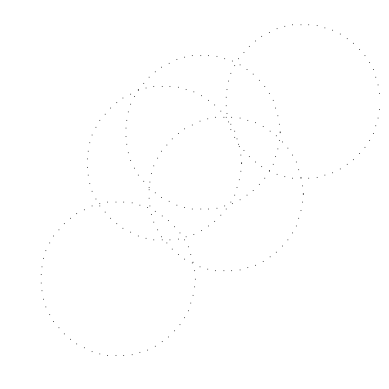

Accumulator size: 32 x 32
Image size: 480 x 480
Radius: 100, Bin size: 15, Theta step: 15°
Edge threshold used: 254
Number of edge points: 230103
Max votes in accumulator: 5400
Min votes required: 90
Detected 1024 potential circles before filtering
Circle detected at (367, 352) with 5400 votes
Circle detected at (112, 112) with 5398 votes
Circle detected at (112, 262) with 5397 votes
Circle detected at (277, 367) with 5397 votes
Circle detected at (337, 367) with 5397 votes
Circle detected at (112, 142) with 5396 votes
Circle detected at (142, 142) with 5396 votes
Circle detected at (127, 202) with 5396 votes
Circle detected at (322, 202) with 5396 votes
Circle detected at (337, 277) with 5396 votes
Circle detected at (202, 292) with 5396 votes
Circle detected at (367, 322) with 5396 votes
Circle detected at (217, 367) with 5396 votes
Circle detected at (307, 367) with 5396 votes
Circle detected at (172, 112) with 5395 votes
Circle detected at (367, 217) with 5395 votes
Circle detected

In [59]:
# Hough Circle Detection
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
rootpath = '/content/gdrive/MyDrive/cs558_resources/hw2'
circle_image = cv2.imread(os.path.join(rootpath, "circles.png"))
circle_image = cv2.cvtColor(circle_image, cv2.COLOR_BGR2GRAY)
imshow(circle_image)

# true radius of circles
r = 100

# these values are not necessarily good
count = 90
bin_size = 15
theta_step = 15
centers = hough_circles(circle_image, r, count, bin_size, theta_step)
